In [ ]:
# 필요 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE

from tqdm import tqdm

In [ ]:
# 분석 데이터 로드
data = pd.read_csv('./fab.csv')

In [ ]:
data

,SensorTime,Sensor0,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,...,Sensor581,Sensor582,Sensor583,Sensor584,Sensor585,Sensor586,Sensor587,Sensor588,Sensor589,Pass_Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [ ]:
# 기본적인 데이터 분포 확인
basic_stats = data.describe()
basic_stats

,Sensor0,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,...,Sensor581,Sensor582,Sensor583,Sensor584,Sensor585,Sensor586,Sensor587,Sensor588,Sensor589,Pass_Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


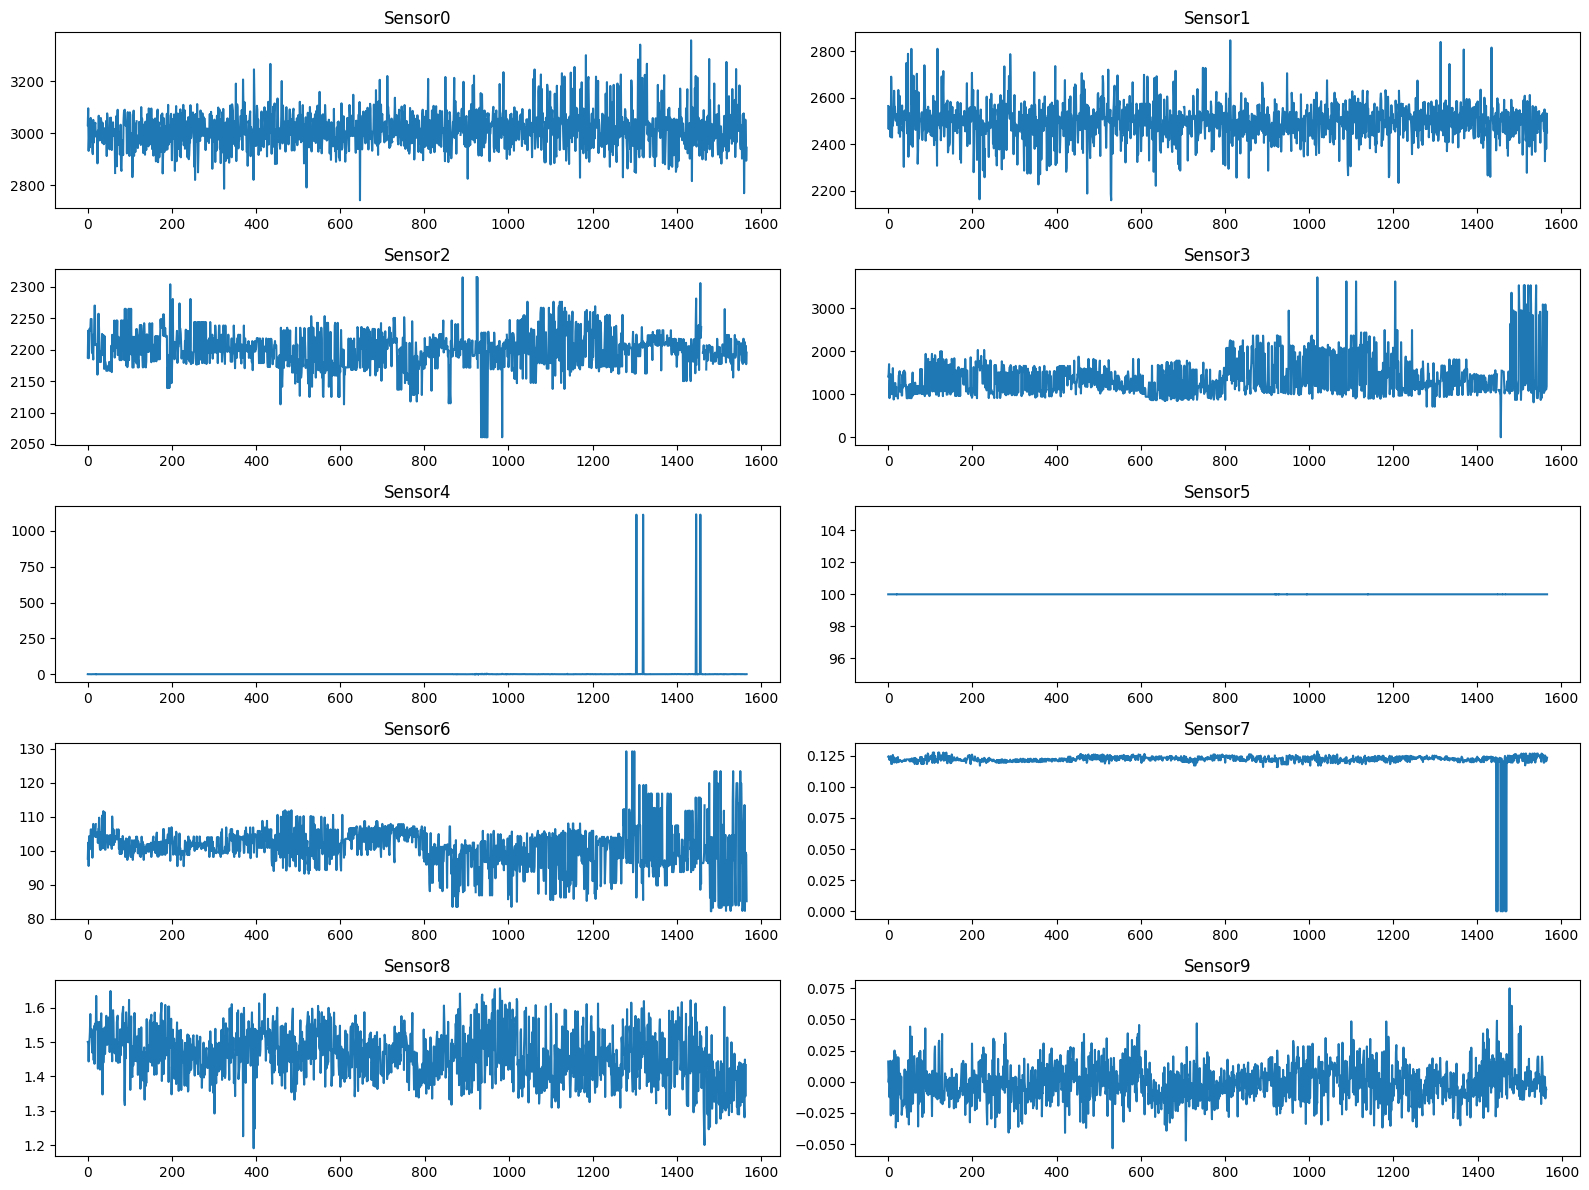

In [ ]:
# 로드한 센서데이터 그래프 시각화.

# 센서 컬럼이 590개이므로, 슬라이스해서 10개씩 그래프 확인.
# 'SensorTime' 컬럼 제외하고 시각화.
sensors_to_plot = data.columns[21:31]

plt.figure(figsize=(16, 12))

for i, sensor in enumerate(sensors_to_plot, 1):
    plt.subplot(5, 2, i)
    plt.plot(data[sensor])
    plt.title(sensor)
    plt.tight_layout()

plt.show()

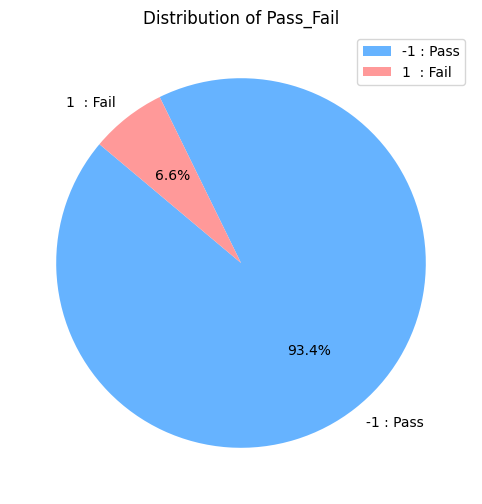

In [ ]:
# 공정 합격/불량 여부를 파이그래프로 시각화
labels = ['-1 : Pass', '1  : Fail']
colors = ['#66b3ff', '#ff9999']

pass_fail_counts = data['Pass_Fail'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(pass_fail_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Pass_Fail')
plt.legend()
plt.show()

In [ ]:
# 데이터 결측치 상황 확인
missing_values_count = data.isnull().sum()
missing_values_count

SensorTime     0
Sensor0        6
Sensor1        7
Sensor2       14
Sensor3       14
              ..
Sensor586      1
Sensor587      1
Sensor588      1
Sensor589      1
Pass_Fail      0
Length: 592, dtype: int64

In [ ]:
# 센서별 결측치를, 각 센서의 평균값으로 대체
data_filled = data.fillna(data.mean())

# 결측치 대체 결과 확인
data_filled.isnull().sum()

<ipython-input-8-ca714d6b2fa2>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled = data.fillna(data.mean())


SensorTime    0
Sensor0       0
Sensor1       0
Sensor2       0
Sensor3       0
             ..
Sensor586     0
Sensor587     0
Sensor588     0
Sensor589     0
Pass_Fail     0
Length: 592, dtype: int64

In [ ]:
# 공정 Pass_Fail 컬럼과 각 센서 값의 상관관계 분석, 절대값으로 계산
correlation = data_filled.corr()['Pass_Fail'].abs()
sorted_correlation = correlation.sort_values(ascending=False).drop('Pass_Fail')

<ipython-input-9-4a0b305ea40f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data_filled.corr()['Pass_Fail'].abs()


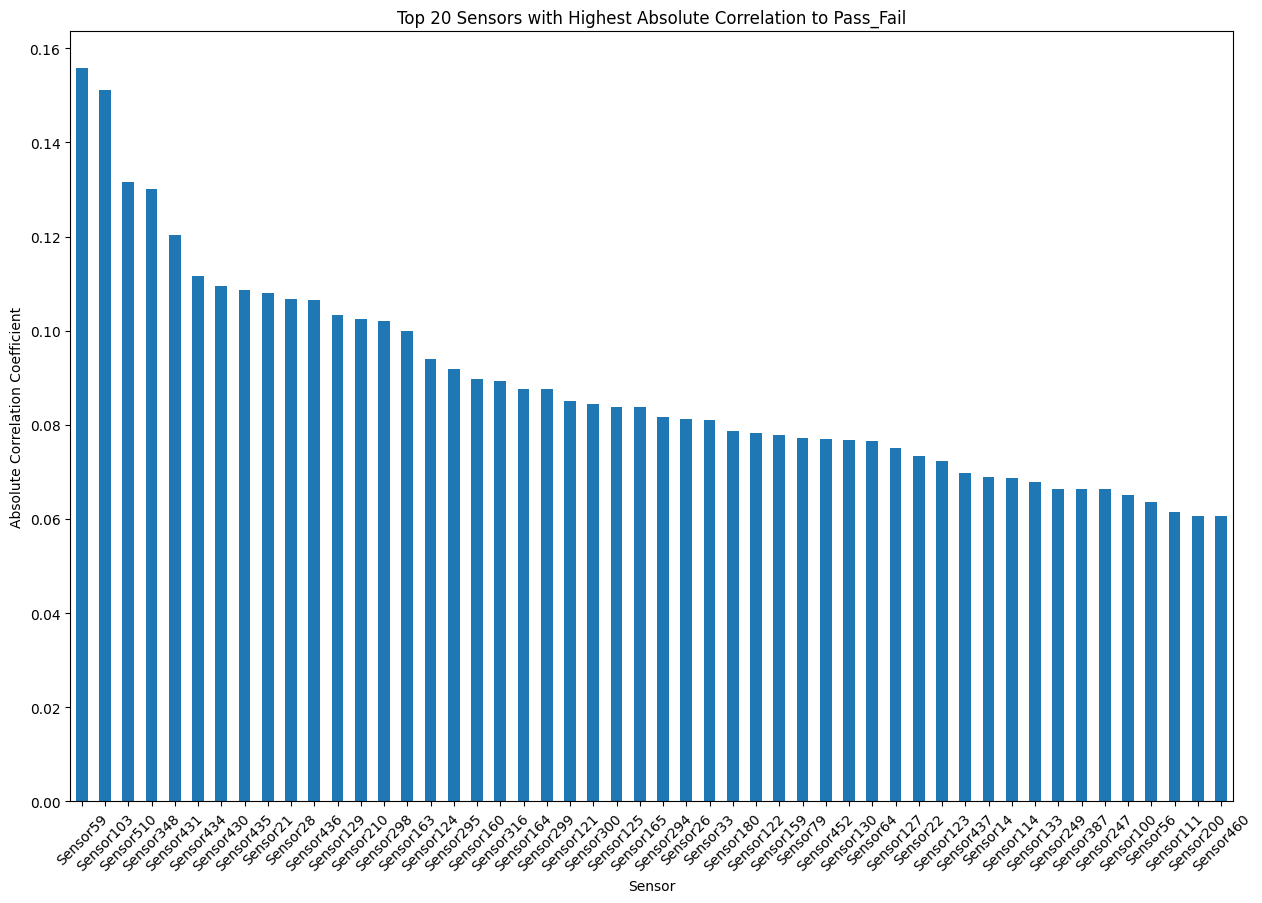

In [ ]:
# 공정 Pass_Fail 컬럼과 상관관계가 높은순서로 센서 컬럼 시각화
plt.figure(figsize=(15, 10))
sorted_correlation.iloc[:50].plot(kind='bar')
plt.title('Top 20 Sensors with Highest Absolute Correlation to Pass_Fail')
plt.ylabel('Absolute Correlation Coefficient')
plt.xlabel('Sensor')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 상관 계수의 값이 0.069 이상인 센서까지 선택 (총 40개)
top_40_sensors = sorted_correlation.iloc[0:40].index.tolist()

In [ ]:
top_40_sensors

['Sensor59',
 'Sensor103',
 'Sensor510',
 'Sensor348',
 'Sensor431',
 'Sensor434',
 'Sensor430',
 'Sensor435',
 'Sensor21',
 'Sensor28',
 'Sensor436',
 'Sensor129',
 'Sensor210',
 'Sensor298',
 'Sensor163',
 'Sensor124',
 'Sensor295',
 'Sensor160',
 'Sensor316',
 'Sensor164',
 'Sensor299',
 'Sensor121',
 'Sensor300',
 'Sensor125',
 'Sensor165',
 'Sensor294',
 'Sensor26',
 'Sensor33',
 'Sensor180',
 'Sensor122',
 'Sensor159',
 'Sensor79',
 'Sensor452',
 'Sensor130',
 'Sensor64',
 'Sensor127',
 'Sensor22',
 'Sensor123',
 'Sensor437',
 'Sensor14']

In [ ]:
# 타겟 데이터 재결합
features = top_40_sensors + ['Pass_Fail']

# 선택된 40개 센서데이터와 타겟데이터로 학습데이터 구축
data_for_modeling = data_filled[features]

In [ ]:
# 학습데이터(X)와 타겟데이터(y) 분리
X = data_for_modeling.drop('Pass_Fail', axis=1)
y = data_for_modeling['Pass_Fail']

# 학습 데이터세트, 테스트 데이터세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,  stratify=y)
# k-fold 검증방법

# 분리 결과 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1049, 40), (518, 40), (1049,), (518,))

In [ ]:
# 학습 데이터와 테스트 데이터의 타겟데이터 값 분포 확인
train_distribution = y_train.value_counts()
test_distribution = y_test.value_counts()

train_distribution, test_distribution

(-1    979
  1     70
 Name: Pass_Fail, dtype: int64,
 -1    484
  1     34
 Name: Pass_Fail, dtype: int64)

In [ ]:
# 스케일러 호출
scaler = MinMaxScaler()

# 스케일러 학습
X_train_scaled = scaler.fit_transform(X_train)

# 정규화 적용
X_test_scaled = scaler.transform(X_test)

# 정규화 적용 결과 확인
X_train_scaled.shape, X_test_scaled.shape

((1049, 40), (518, 40))

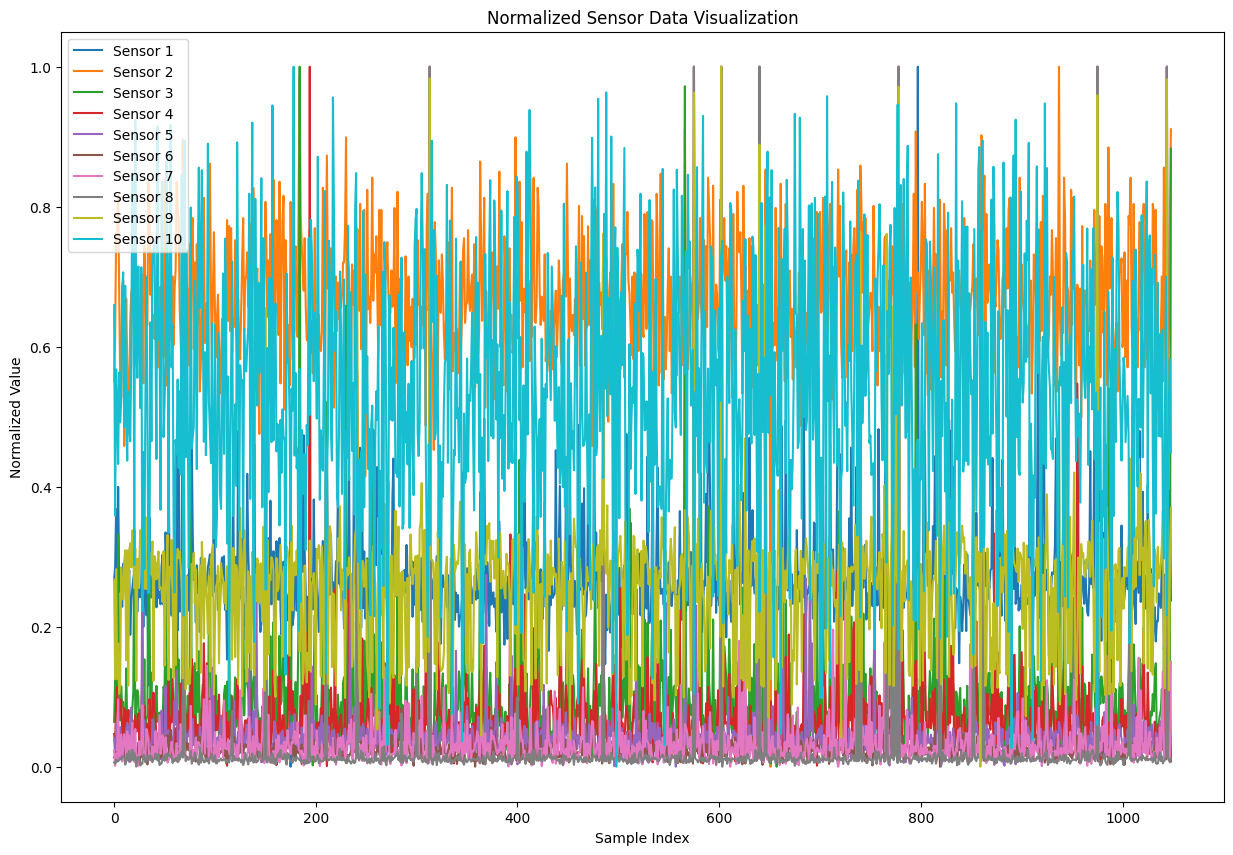

In [ ]:
# 정규화된 첫 10개 센서에 대해서 시각화

plt.figure(figsize=(15, 10))

for i in range(10):
    plt.plot(X_train_scaled[:, i], label=f'Sensor {i+1}')

plt.title('Normalized Sensor Data Visualization')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()

In [ ]:
# SMOTE 객체 생성
smote = SMOTE(random_state=42)
# 오버샘플링

# 훈련 데이터에 SMOTE 적용
X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# 오버샘플링 결과 확인
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: -1    979
 1     70
Name: Pass_Fail, dtype: int64
After SMOTE: -1    979
 1    979
Name: Pass_Fail, dtype: int64


In [ ]:
# 오버샘플링된 훈련데이터셋
X_train_scaled_smote.shape

(1958, 40)

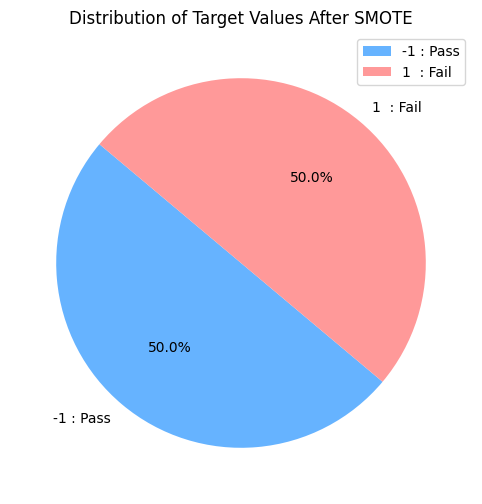

In [ ]:
# 오버샘플링 데이터셋 균형 확인
class_counts = y_train_smote.value_counts()

labels = ['-1 : Pass', '1  : Fail']
colors = ['#66b3ff', '#ff9999']

# 파이 차트 생성
plt.figure(figsize=(8, 6))
plt.pie(class_counts,labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Target Values After SMOTE')
plt.legend()
plt.show()

# 모델링

In [ ]:
# True Negative 스코어링 함수 정의
def tp_scorer(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp

# make_scorer를 사용하여 사용자 정의 스코어링 함수 생성
tp_score = make_scorer(tp_scorer, greater_is_better=True)

# SVM 모델 초기화
svm_model = SVC(kernel='rbf', random_state=42)

# 검색할 매개변수 그리드 설정
param_grid = {
    'C': [0.1, 1, 10, 100],  # C 값 범위
    'gamma': [0.001, 0.01, 0.1, 1]  # gamma 값 범위
}

# GridSearchCV 객체 생성, 사용자 정의 스코어링 함수를 사용
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring=tp_score, verbose=0 )

# 그리드 검색으로 매개변수 최적화
grid_search.fit(X_train_scaled_smote, y_train_smote)

# 최적의 매개변수와 그때의 TN 스코어 출력
print("Best parameters:", grid_search.best_params_)
print("Best TP score:", grid_search.best_score_)

Best parameters: {'C': 100, 'gamma': 0.01}
Best TN score: 195.6


              precision    recall  f1-score   support

          -1       0.96      0.79      0.86       484
           1       0.14      0.50      0.22        34

    accuracy                           0.77       518
   macro avg       0.55      0.64      0.54       518
weighted avg       0.90      0.77      0.82       518

[[380 104]
 [ 17  17]]


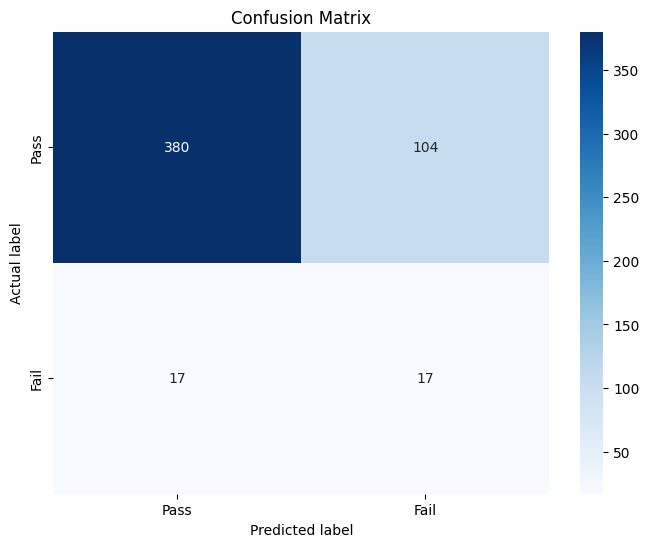

In [ ]:
# SVM 모델 초기화
svm_model = SVC(C=100, gamma=0.01, kernel='rbf', random_state=42)

# 모델 학습
svm_model.fit(X_train_scaled_smote, y_train_smote)

# 훈련된 모델을 사용하여 테스트 데이터셋에 대한 예측 수행
y_pred = svm_model.predict(X_test_scaled)

# confusion matrix 생성
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# 성능 평가
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pass', 'Fail'], yticklabels=['Pass', 'Fail'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# True Negative 스코어링 함수 정의
def tp_scorer(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp

# make_scorer를 사용하여 사용자 정의 스코어링 함수 생성
tp_scorer = make_scorer(tp_scorer, greater_is_better=True)

# Random Forest 모델 초기화
rf = RandomForestClassifier(random_state=42)

# 검색할 매개변수 그리드 설정
param_grid = {
    'n_estimators': [10, 50, 100],  # 트리의 개수
    'max_depth': [None, 10],  # 트리의 최대 깊이
    'min_samples_split': [2, 5],  # 내부 노드를 분할하는데 필요한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],  # 리프 노드에 있어야 하는 최소 샘플 수
}

# GridSearchCV 객체 생성, 사용자 정의 스코어링 함수를 사용
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring=tp_scorer, verbose=0)

# 그리드 검색으로 매개변수 최적화
grid_search_rf.fit(X_train_scaled_smote, y_train_smote)

# 최적의 매개변수와 그때의 TN 스코어 출력
print("Best parameters:", grid_search_rf.best_params_)
print("Best TN score:", grid_search_rf.best_score_)

Accuracy: 0.9111969111969112
              precision    recall  f1-score   support

          -1       0.95      0.96      0.95       484
           1       0.29      0.24      0.26        34

    accuracy                           0.91       518
   macro avg       0.62      0.60      0.61       518
weighted avg       0.90      0.91      0.91       518



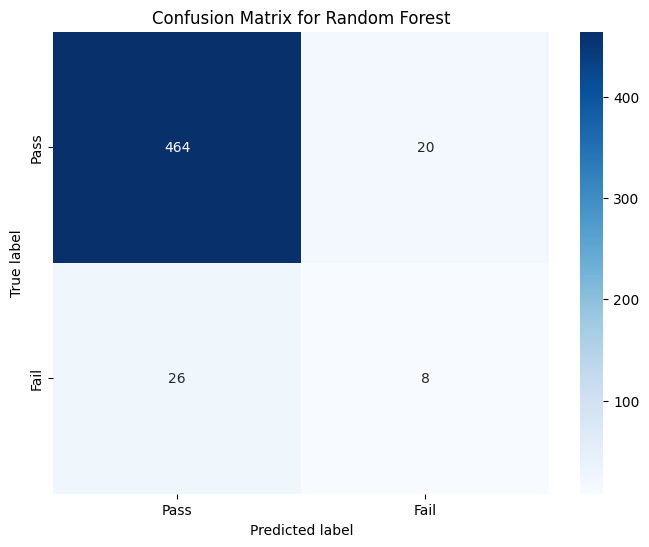

In [ ]:
# Random Forest 모델 초기화
rf_model = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)

# 모델 학습
rf_model.fit(X_train_scaled_smote, y_train_smote)

# 테스트 데이터셋에 대한 예측 수행
y_pred_rf = rf_model.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy}')

# 분류 보고서 출력
print(classification_report(y_test, y_pred_rf))

# 혼동 행렬 계산
cm_rf = confusion_matrix(y_test, y_pred_rf)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Pass', 'Fail'], yticklabels=['Pass', 'Fail'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [ ]:
def tp_scorer(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp

# make_scorer를 사용하여 사용자 정의 스코어링 함수 생성
tp_custom_scorer = make_scorer(tp_scorer, greater_is_better=True)

# XGBoost 모델 학습을 위한 y값 변형
y_train_smote_xgb = (y_train_smote + 1) / 2
y_test_xgb = (y_test + 1) / 2

# XGBoost 분류기 초기화
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 검색할 매개변수 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],  # 트리의 개수
    'max_depth': [3, 6, 9],  # 트리의 최대 깊이
    'learning_rate': [0.01, 0.1, 0.2],  # 학습률
}

# GridSearchCV 객체 생성, 사용자 정의 스코어링 함수를 사용
grid_search_xgb = GridSearchCV(xgb_model, param_grid, cv=5, scoring=tp_custom_scorer, verbose=0)

# 그리드 검색으로 매개변수 최적화
grid_search_xgb.fit(X_train_scaled_smote, y_train_smote_xgb)

# 최적의 매개변수와 그때의 TN 스코어 출력
print("Best parameters:", grid_search_xgb.best_params_)
print("Best TP score:", grid_search_xgb.best_score_)

In [ ]:
# XGBoost 모델 학습을 위한 y값 변형
y_train_smote_xgb = (y_train_smote + 1) / 2
y_test_xgb = (y_test + 1) / 2

# 파라미터
params = []
# tp 결과
tp_result = []
acc_list = []

for est in tqdm([10, 50, 75, 100, 150, 200]):
  for dep in [0, 1, 3, 5, 9, 12, 15, 17, 20]:
    for rate in [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]:
      # XGBoost 분류기 초기화
      xgb_model = xgb.XGBClassifier(learning_rate=rate, max_depth=dep, n_estimators=est, use_label_encoder=False, eval_metric='logloss')
      # xgb_model = xgb.XGBClassifier(learning_rate=rate, n_estimators=est, use_label_encoder=False, eval_metric='logloss', booster = 'gblinear')

      # 모델 학습
      xgb_model.fit(X_train_scaled_smote, y_train_smote_xgb)

      # 테스트 데이터셋에 대한 예측 수행
      y_pred_xgb = xgb_model.predict(X_test_scaled)

      # 정확도 평가
      accuracy_xgb = accuracy_score(y_test_xgb, y_pred_xgb)
      # print(f'Accuracy: {accuracy_xgb}')

      # 분류 보고서 출력
      # print(classification_report(y_test_xgb, y_pred_xgb))

      # confusion matrix 계산
      cm_xgb = confusion_matrix(y_test_xgb, y_pred_xgb)
      tn, fp, fn, tp = cm_xgb.ravel()

      params.append([rate, dep, est])
      tp_result.append([tp,accuracy_xgb])
      acc_list.append(accuracy_xgb)


100%|██████████| 6/6 [05:01<00:00, 50.25s/it]


In [ ]:
max(tp_result)

[23, 0.8223938223938224]

In [ ]:
max(acc_list)

0.9227799227799228

In [ ]:
x = max(tp_result)[0]

# x 값의 모든 인덱스를 찾음
indices = [i for i, value in enumerate(tp_result) if value[0] == x]

print(indices)

[115]


In [ ]:
params[115]

[0.05, 1, 75]

Accuracy: 0.8223938223938224
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.90       484
         1.0       0.22      0.68      0.33        34

    accuracy                           0.82       518
   macro avg       0.60      0.75      0.62       518
weighted avg       0.92      0.82      0.86       518



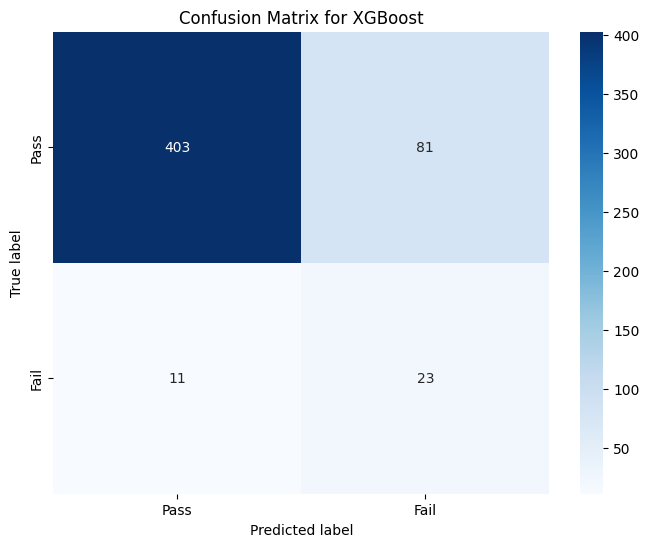

In [ ]:
# XGBoost 모델 학습을 위한 y값 변형
y_train_smote_xgb = (y_train_smote + 1) / 2
y_test_xgb = (y_test + 1) / 2

# XGBoost 분류기 초기화
# xgb_model = xgb.XGBClassifier(learning_rate=0.01, n_estimators=10, use_label_encoder=False, eval_metric='logloss', booster = 'gblinear')
xgb_model = xgb.XGBClassifier(learning_rate=0.05, max_depth=1, n_estimators=75, use_label_encoder=True, eval_metric='logloss')

# 모델 학습
xgb_model.fit(X_train_scaled_smote, y_train_smote_xgb)

# 테스트 데이터셋에 대한 예측 수행
y_pred_xgb = xgb_model.predict(X_test_scaled)
# weight

# 정확도 평가
accuracy_xgb = accuracy_score(y_test_xgb, y_pred_xgb)
print(f'Accuracy: {accuracy_xgb}')

# 분류 보고서 출력
print(classification_report(y_test_xgb, y_pred_xgb))

# confusion matrix 계산
cm_xgb = confusion_matrix(y_test_xgb, y_pred_xgb)
tn, fp, fn, tp = cm_xgb.ravel()

# confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Pass', 'Fail'], yticklabels=['Pass', 'Fail'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XGBoost')
plt.show()

In [ ]:
feature_importances = xgb_model.feature_importances_

feature_names = top_40_sensors
# 특성 중요도에 따라 내림차순으로 정렬
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = np.array(feature_names)[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

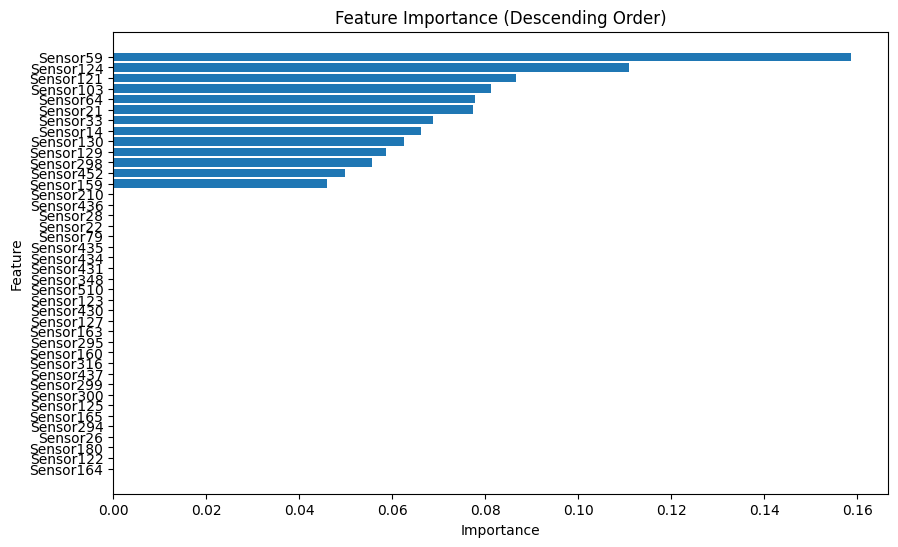

In [ ]:
# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_importances, align='center')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.gca().invert_yaxis()  # 중요도가 높은 특성부터 위로 가도록 순서를 뒤집습니다.
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Descending Order)')
plt.show()